<a href="https://colab.research.google.com/github/caranugent/DE300/blob/main/_sources/notes/02-exploratory-data-analysis-class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
Exploratory data analysis, or EDA, is a standard practice prior to any data manipulation and analysis.

Recall that data engineering is primarily about data preparation to *serve* smooth and effective data analysis.  Exploratory data analysis generally refers to the step of understanding the data:  
- **summarizing characteristics of raw data**
- **visualizing data (single and multiple variables)**
- identifying missing data
- identifying outliers

This document primarily deals with the first two items.  

## Goals
In the **exploratory** phase, these are for people behind the scenes to see.  

The main goals here are:
- capture main message
- (relatively) quick exploration across many summaries (including plots)
- *not* intended for a client or presentation

What does this translate to, technically?
- each summary should have meaningful information
- **label** your plots

## Data summary
As a starting point, simply looking at the data is worth the while.  Some common questions to consider are the following:  


1. General dataset info: size, dtypes  
2. Missing values?  
3. Duplicate data?  
4. Continuous variables  
5. Categorical variables  
6. Bivariate relationships  
7. Potential data quality issues, e.g., inconsistency, special NA characters

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

|![sns](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/sns.jpg?raw=1)|
|:---:|
|[The origin of sns.](https://seaborn.pydata.org/faq.html#why-is-seaborn-imported-as-sns)|

In [ ]:
# return all available datasets in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### [Exoplanet dataset source](https://science.nasa.gov/exoplanets/exoplanet-catalog/)

In [3]:
# load and save a copy of the planet dataset
planet = sns.load_dataset('planets', cache=True, data_home='dataset/')

In [ ]:
# take a glimpse of the data
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# view a summary of the full data
planet.info()

<bound method DataFrame.sum of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [ ]:
# checks for duplicates (also ask if duplicates make sense)
planet.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1030,False
1031,False
1032,False
1033,False


In [ ]:
# duplicates
planet[planet.duplicated()]

planet.loc[902:903]                 # row labels (inclusive)
# planet.iloc[902:903]              # row index locs (exclusive)

,method,number,orbital_period,mass,distance,year
902,Microlensing,1,NaN,NaN,NaN,2008


In [ ]:
# a quick numerical summary
planet.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
# checks for possible statistical assumption(s)
import scipy.stats as sps

In [ ]:
# extract only numeric variables
planet_num = planet.select_dtypes(include="number")

In [ ]:
# for example, normality test
planet_num.info()
sps.normaltest(planet_num, nan_policy="omit")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          1035 non-null   int64  
 1   orbital_period  992 non-null    float64
 2   mass            513 non-null    float64
 3   distance        808 non-null    float64
 4   year            1035 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 40.6 KB


NormaltestResult(statistic=array([ 418.17253668, 2441.16718731,  291.02624705, 1095.50737338,
        231.14693458]), pvalue=array([1.56670568e-091, 0.00000000e+000, 6.37460692e-064, 1.29896195e-238,
       6.41329034e-051]))

In [ ]:
# for example, another normality test
[sps.shapiro(planet_num.iloc[:,i], nan_policy="omit") for i in range(planet_num.shape[1])]

[ShapiroResult(statistic=np.float64(0.6709471817366444), pvalue=np.float64(1.0315020448806315e-40)),
 ShapiroResult(statistic=np.float64(0.0419687405047241), pvalue=np.float64(8.849530159914829e-57)),
 ShapiroResult(statistic=np.float64(0.6838350972059891), pvalue=np.float64(7.62159496581544e-30)),
 ShapiroResult(statistic=np.float64(0.3285118378963834), pvalue=np.float64(3.9487343847233343e-47)),
 ShapiroResult(statistic=np.float64(0.8797521264771992), pvalue=np.float64(1.5069114137301717e-27))]

In [ ]:
# pairwise correlation
planet_num.corr()

## Data visualization

In [ ]:
sns.set(context='talk', style='ticks')  # simply for aesthetics
sns.set_palette('magma')
%matplotlib inline

# planet = planet.sample(n=500)  # (if too slow) for illustration purposes

<Axes: >

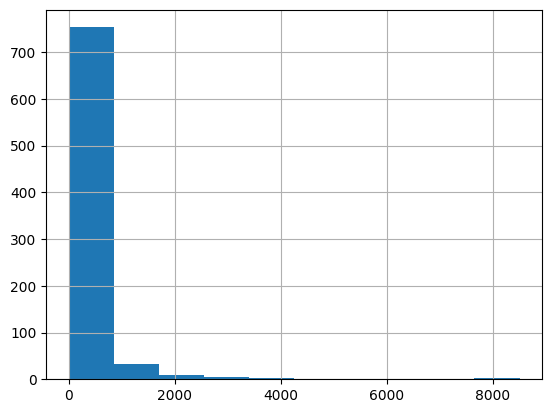

In [4]:
# histogram for continuous variables using pandas built-in plots
planet['distance'].hist()

In [5]:
# relative frequency? ...
sns.histplot(planet_num['distance'], stat='probability')
sns.histplot(x='distance', data=planet_num, stat='probability')

NameError: name 'planet_num' is not defined

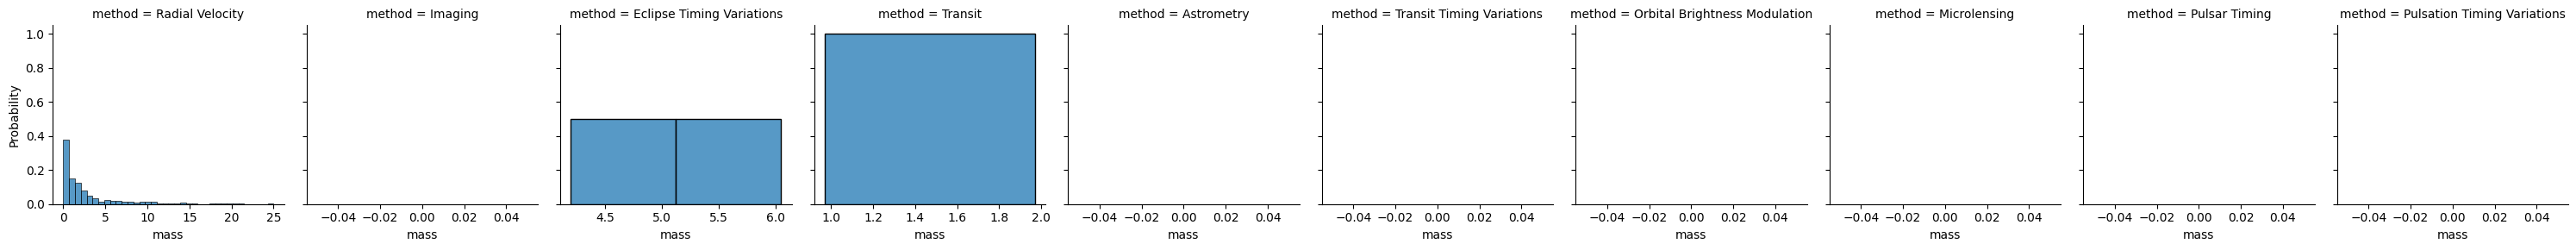

In [ ]:
# histogram of masses by group
g = sns.FacetGrid(planet, col='method', sharex=False)
g.map(sns.histplot, 'mass', stat='probability')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


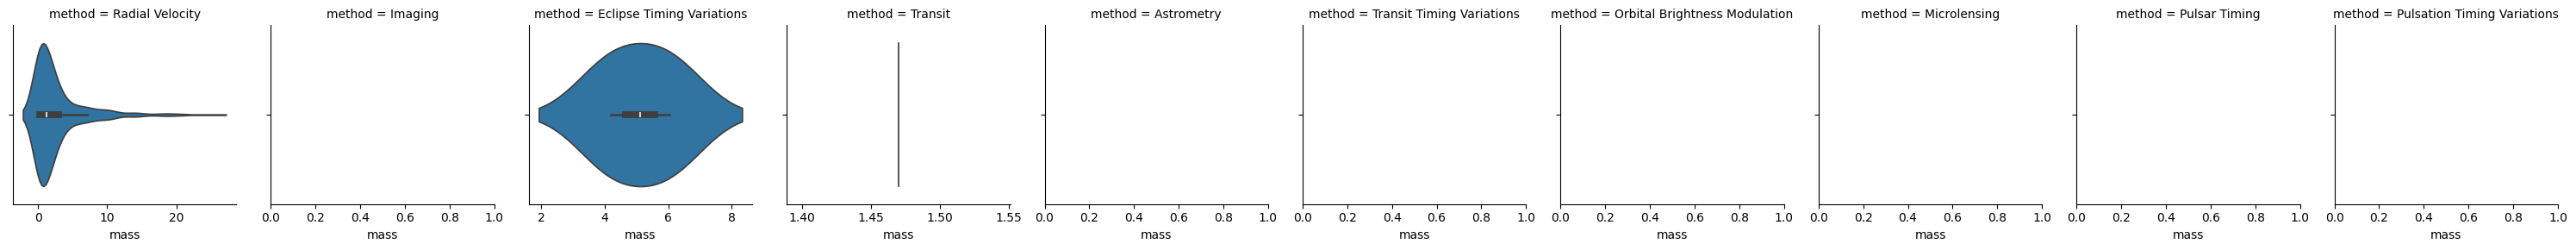

In [ ]:
# other types of plots
g = sns.FacetGrid(planet, col='method', sharex=False)
g.map(sns.violinplot, 'mass') #, stat='probability')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Radial Velocity'),
  Text(1, 0, 'Imaging'),
  Text(2, 0, 'Eclipse Timing Variations'),
  Text(3, 0, 'Transit'),
  Text(4, 0, 'Astrometry'),
  Text(5, 0, 'Transit Timing Variations'),
  Text(6, 0, 'Orbital Brightness Modulation'),
  Text(7, 0, 'Microlensing'),
  Text(8, 0, 'Pulsar Timing'),
  Text(9, 0, 'Pulsation Timing Variations')])

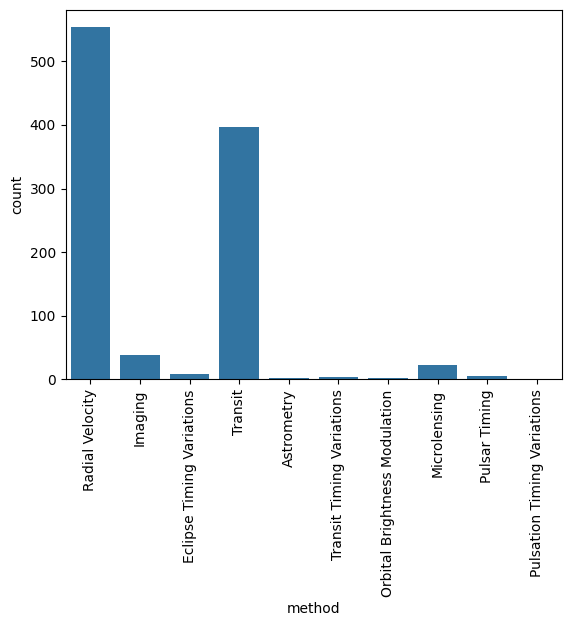

In [9]:
# counts for categorical variables
sns.countplot(x='method', data=planet)  #  hue='cut',
plt.xticks(rotation=90)

In [ ]:
# barplots by group

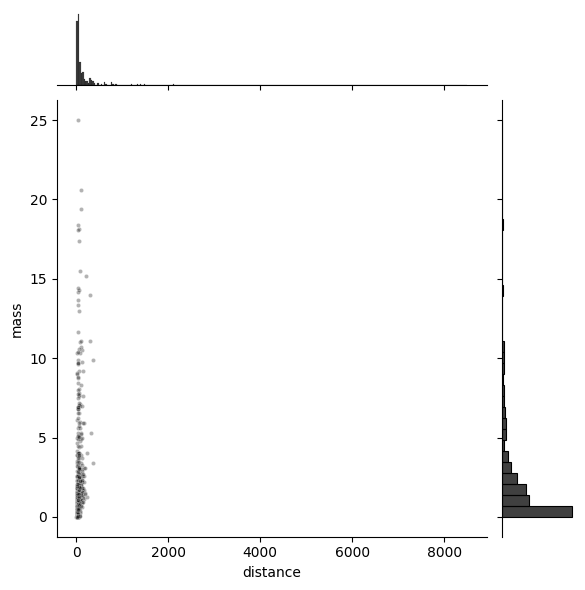

In [8]:
# bivariate plots
sns.jointplot(x='distance', y='mass', data=planet, alpha=.3, color='k', marker='.')

In [ ]:
# bivariate plots (log-log)
sns.jointplot(x='distance', y='mass', data=planet, alpha=.3, color='k', marker='.')
plt.xscale('log')
plt.yscale('log')

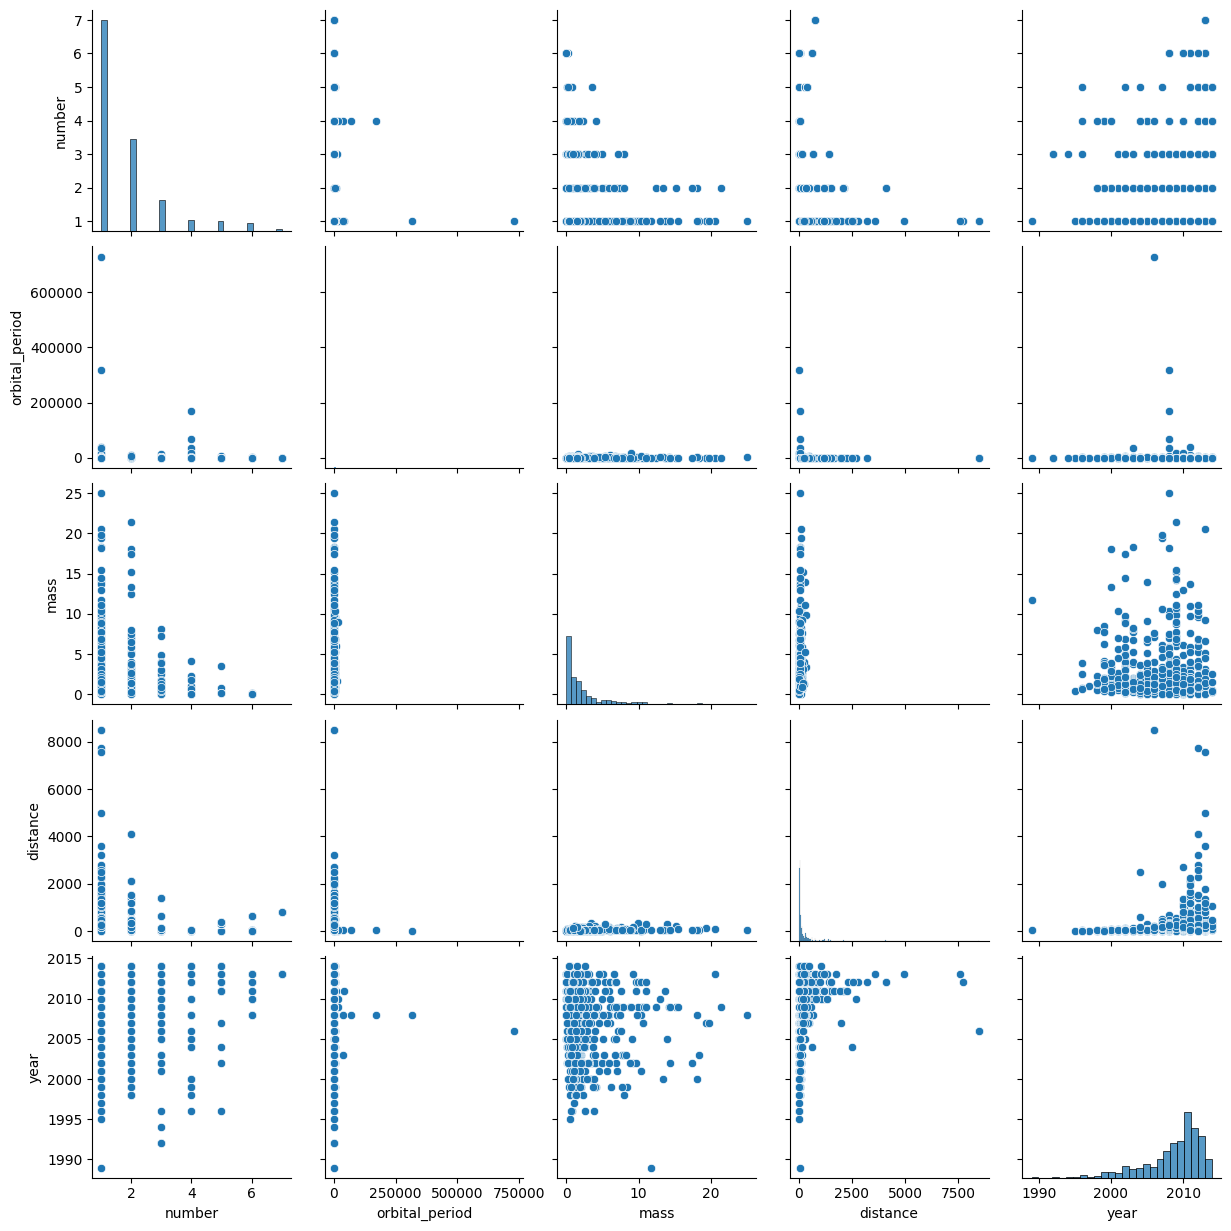

In [ ]:
# pairwise plots  (time-consuming)
sns.pairplot(planet_num)

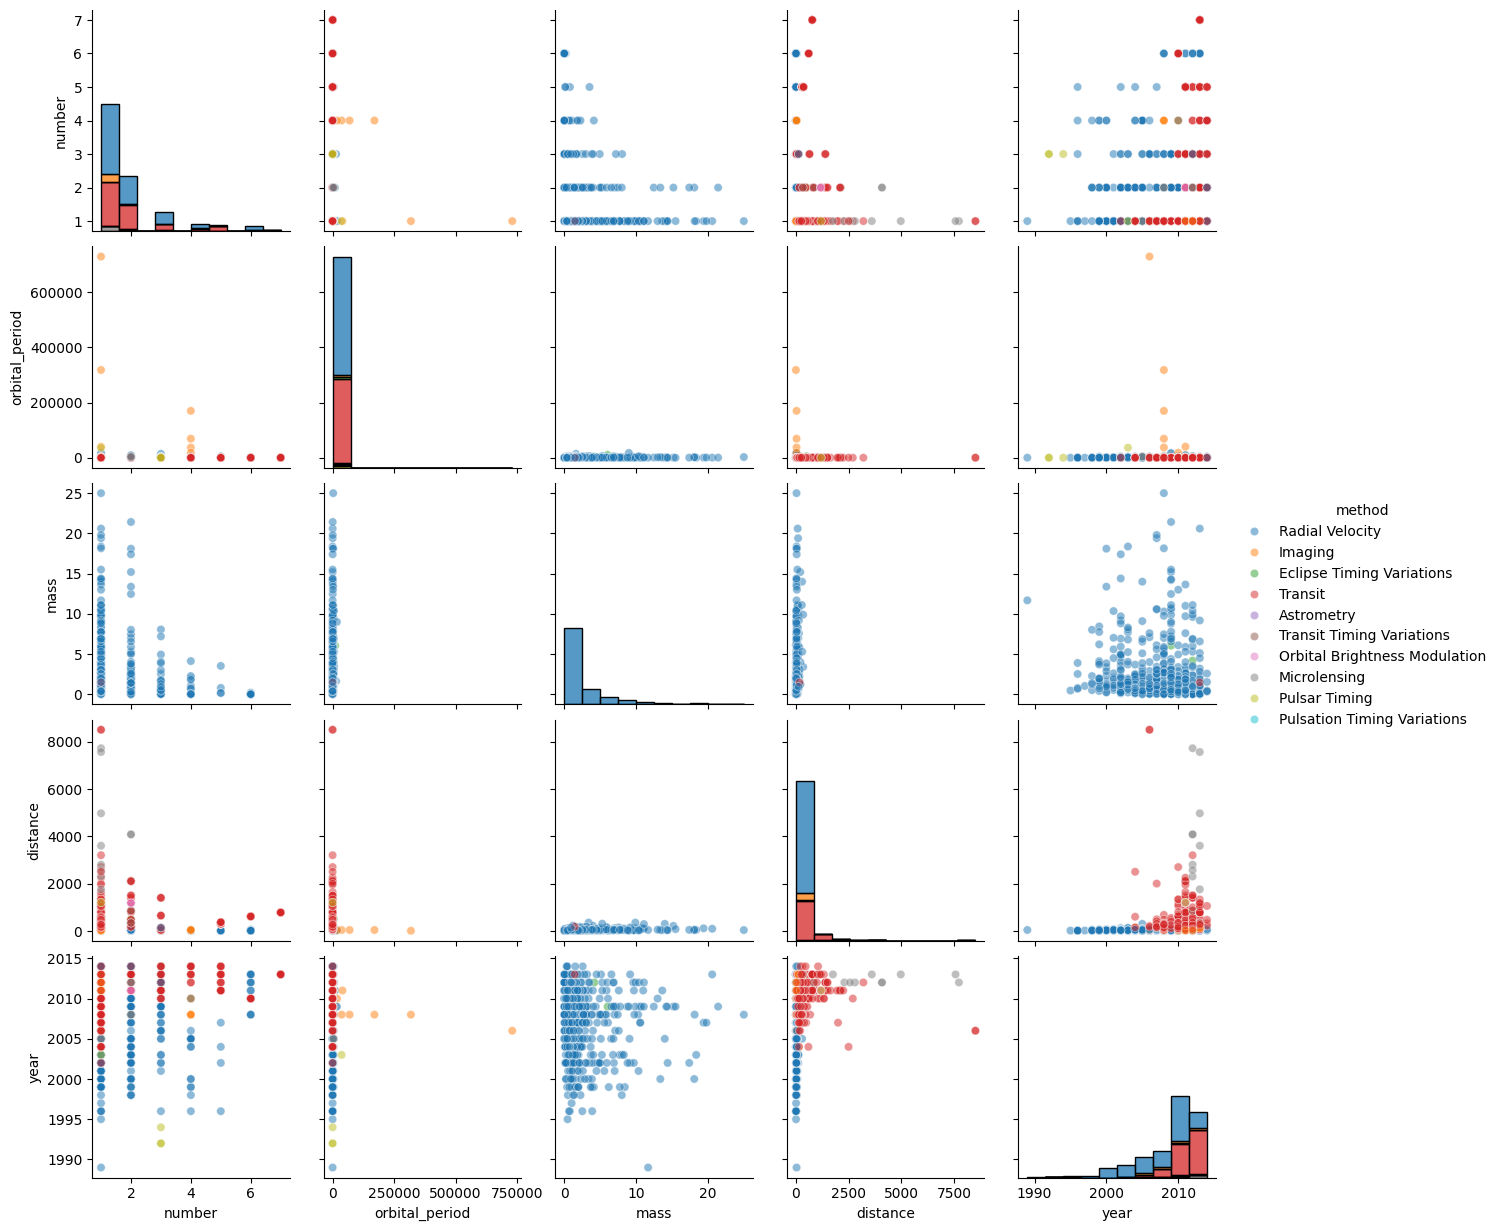

In [ ]:
# another pairwise plot by group
sns.pairplot(planet, hue='method',
             diag_kind = 'hist', diag_kws= {'multiple': 'stack', 'bins' : 10},
             plot_kws={'alpha':0.5})

# (Exercise) Penguins data

We may dive into the penguins dataset as an exercise.

Example questions:

- Practice on some of the exploratory questions above
- How many penguins are in the dataset for each species?
- Do the penguin sizes differ by species, or where they live?
- If we were to build a predictive model for the "sex" of penguins, how might we approach this?
- If we were to build a predictive model for the "size" of penguins, how might we approach this?

In [6]:
penguins = sns.load_dataset('penguins', cache=True, data_home='dataset')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


([0, 1, 2],
 [Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')])

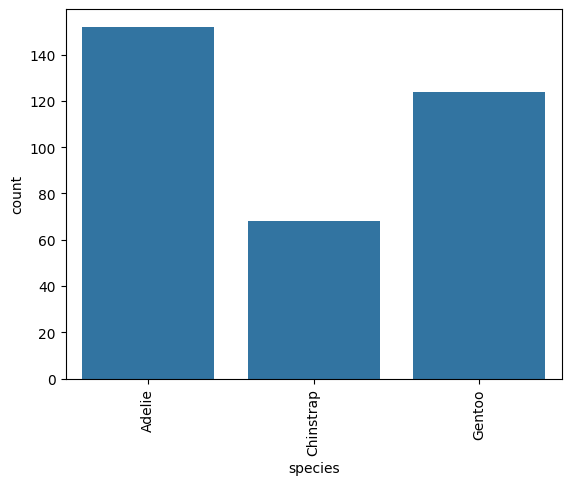

In [11]:
# How many penguins are in the dataset for each species?

# penguins['species'].hist()

sns.countplot(x='species', data=penguins)  #  hue='cut',
plt.xticks(rotation=90)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

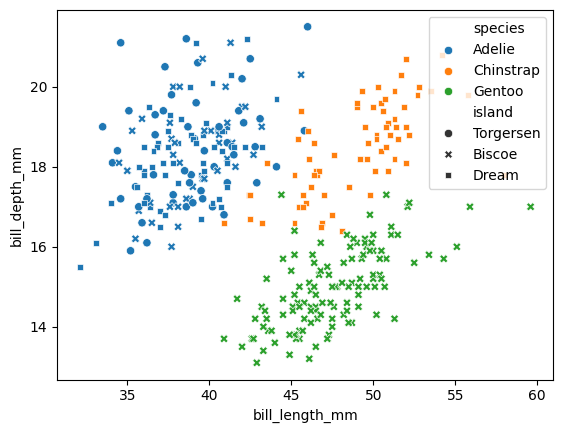

In [22]:
# Do the penguin sizes differ by species, or where they live?

# sns.pairplot(penguins, hue = 'species')

# sns.scatterplot(x ='island', y='body_mass_g', data=penguins, hue='species')

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', style='island', data=penguins)

# sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='island', style='species', data=penguins)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

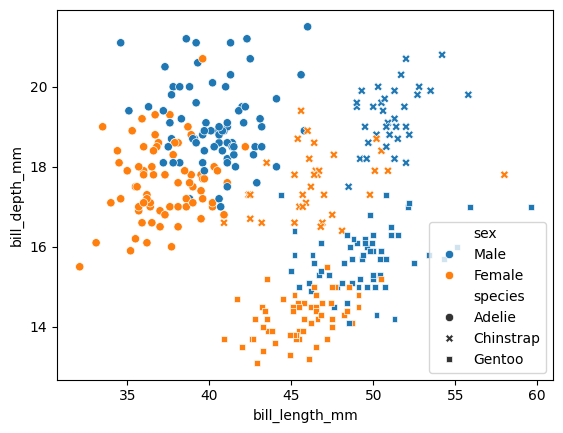

In [24]:
# If we were to build a predictive model for the "sex" of penguins, how might we approach this?

# sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='sex', style='species', data=penguins)

In [ ]:
# If we were to build a predictive model for the "size" of penguins, how might we approach this?

## (In case you need this) Jupyter notebook setup

Visit https://docs.jupyter.org/en/latest/install/notebook-classic.html for some guidance to set up jupyter notebook.


---

*Note:* These notes are adapted from a blog post on [Tom's Blog](https://tomaugspurger.net/posts/modern-6-visualization/).
